In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붗꽃 데이터를 로딩, 학습과 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

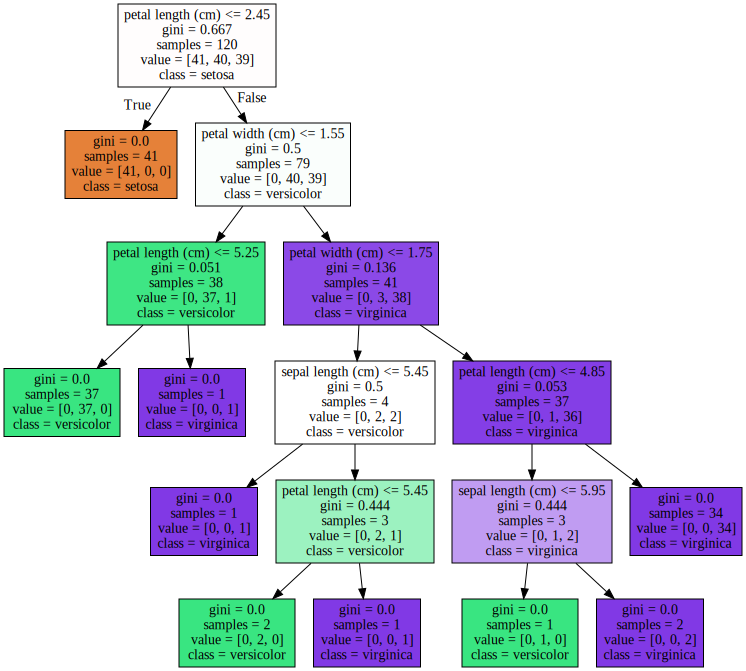

In [3]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

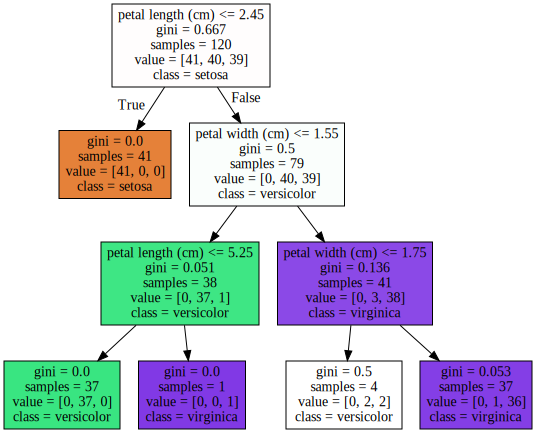

In [4]:
## max_depth = 3 일때
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

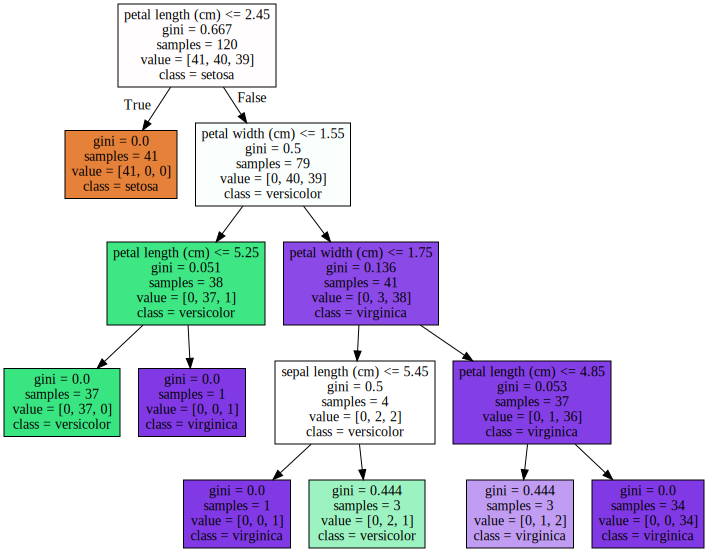

In [5]:
# max_samples_split 하이퍼 파라미터 변경에 따른 규칙
# 자식 규칙 노드를 분할해 만들기 위한 최소한의 Sample 데이터 수 
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

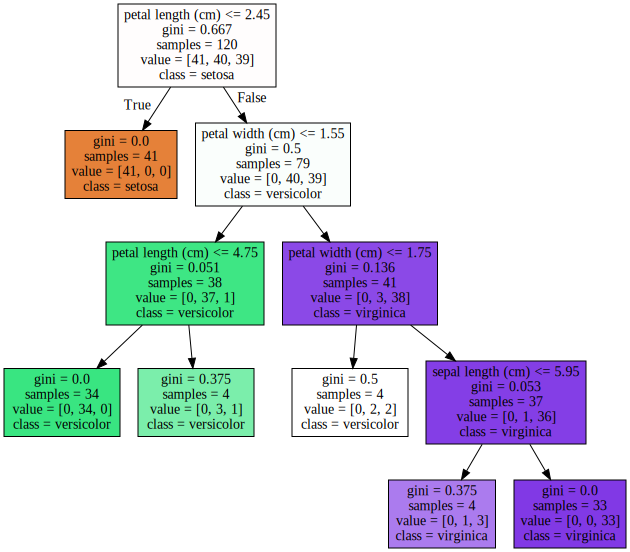

In [6]:
# max_samples_leaf 하이퍼 파라미터 변경에 따른 규칙
# 리프 노드가 되기 위한 최소한의 Sample 데이터 수 
# Sample 데이터 수를 만들기 위해 규직이 변경 된다.
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


<AxesSubplot:>

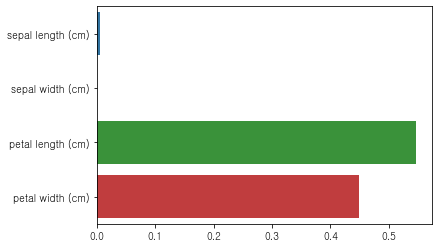

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print("{0} : {1:.3f}".format(name,value))
  
# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [8]:
!jupyter nbconvert --to html ./결정트리_그래프로_확인하기.ipynb

[NbConvertApp] Converting notebook ./결정트리_그래프로_확인하기.ipynb to html
[NbConvertApp] Writing 654285 bytes to 결정트리_그래프로_확인하기.html
